## Implementing RMS Prop

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating features
np.random.seed(100)
x = tf.constant(np.random.randint(100, size =(10,2)), dtype = tf.float32)
x

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 8., 24.],
       [67., 87.],
       [79., 48.],
       [10., 94.],
       [52., 98.],
       [53., 66.],
       [98., 14.],
       [34., 24.],
       [15., 60.],
       [58., 16.]], dtype=float32)>

In [3]:
# Generating lables with w and b.
# w1 = 1  w2 = 3   b = 5
w = [2, 3]
b = -5

# y = w1*x1 + w2*x2 + b 
m = tf.constant(np.asarray([w]), dtype = tf.float32)
b = tf.constant(b, dtype = tf.float32)
y = tf.squeeze(tf.matmul(m,x, transpose_b = True) + b)
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 83., 390., 297., 297., 393., 299., 233., 135., 205., 159.],
      dtype=float32)>

Text(0, 0.5, 'Y')

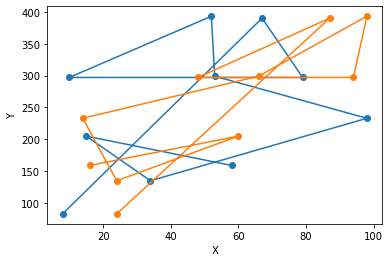

In [4]:
# visualizing the data for univariate
plt.plot(x, y, marker='o')
plt.xlabel("X")
plt.ylabel("Y")


In [5]:
# Computing rmse loss function
def compute_rmse(y_label, y_pred):
    return tf.sqrt(tf.reduce_mean(((y_label - y_pred)**2)))

def compute_mse(y_label, y_pred):
    return tf.reduce_mean(((y_label - y_pred)**2))


In [6]:
# Computing gradients
def gradients_mse(X, Y, Y_PREDS):
    DW1 = tf.matmul(X, tf.reshape(Y-Y_PREDS, (X.shape[0],1)), transpose_a = True) * (-2/X.shape[0])
    DW0 = (-2 / X.shape[0]) * tf.reduce_sum(Y - Y_PREDS)
    return DW1, DW0
    

In [7]:
w_vector = np.random.uniform(-2,2, size =(x.shape[1],1))
w_vector

array([[ 0.24918506],
       [-1.97673123]])

In [38]:
EPOCHS = 100

w3 = tf.Variable(w_vector, dtype = tf.float32)
w4 = tf.Variable(0, dtype = tf.float32)

w1 = tf.Variable(w_vector, dtype = tf.float32)
w0 = tf.Variable(0, dtype = tf.float32)
lr = 1e-5
LOSS = []

beta = 0.9
epilson = 1e-7
momentum = 0.9
sdw3 = tf.zeros(w3.shape)
sdw4 = tf.zeros(w4.shape)
momw3 = tf.zeros(w3.shape)
momw4 = tf.zeros(w4.shape)

for epoch in range(1,EPOCHS+1):
    with tf.GradientTape() as tape:
        y_pred = tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)
        loss = compute_mse(y, y_pred)
    
    gradients = tape.gradient(loss, [w1, w0])
    w1.assign_sub(gradients[0] * lr)
    w0.assign_sub(gradients[1] * lr)
    
    y_pred1 = tf.squeeze(tf.matmul(w3,x, transpose_a = True, transpose_b = True) + w4)
    dw3, dw4 = gradients_mse(x, y, y_pred1)
    
    sdw3 = beta * sdw3 + (1-beta) * tf.square(dw3)
    sdw4 = beta * sdw4 + (1-beta) * tf.square(dw4)
    
    momw3 = momentum * momw3 + lr * (dw3 / (tf.math.sqrt(sdw3 + epilson)))
    momw4 = momentum * momw4 + lr * (dw4 / (tf.math.sqrt(sdw4 + epilson)))
    
    w3.assign_sub(momw3)
    w4.assign_sub(momw4)
    
    
    loss = compute_mse(y, y_pred1)
    LOSS.append(loss)
    
    
    
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy(), gradients[1].numpy()))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy(), dw4.numpy()))
#     print()
#     print("After Epoch: {} dw1: {} dw0: {}".format(epoch, gradients[0].numpy() * lr, gradients[1].numpy() * lr))
#     print("After Epoch: {} dw3: {} dw4: {}".format(epoch, dw3.numpy() * lr, dw4.numpy() * lr))
#     print()
#     print("After Epoch: {} w1: {} w0: {}".format(epoch, w1.numpy(), w0.numpy()))
#     print("After Epoch: {} w3: {} w4: {}".format(epoch, w3.numpy(), w4.numpy()))
#     print('After Epoch: {} Loss Tensorflow = {} Loss Equation = {}'.format(epoch, loss, loss))
#     print('---------------------------------------------------------------\n')
    
    
    
print('Final Results')
print('================================')
# print('w1 : {}'.format(w1.numpy()))
# print('w0 : {}'.format(w0.numpy()))
print('w3 : {}'.format(w3.numpy()))
print('w4 : {}'.format(w4.numpy()))
print('Final Loss : {}'.format(LOSS[-1]))

    


    
    

    

    
    

Final Results
w3 : [[ 0.25919673]
 [-1.9667189 ]]
w4 : 0.010011956095695496
Final Loss : 139709.828125


In [37]:
# using keras to get same results
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units = 1,  name = 'd1', input_shape = (x.shape[1],)))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=1e-5, rho=0.9, momentum=0.9, epsilon=1e-07, centered=False),
                loss="mse")
    
    return model
model = create_model()

d1 = model.get_layer('d1')
d1_weights = [tf.constant(w_vector, dtype = tf.float32), tf.constant(np.array([0]), dtype = tf.float32)]
d1.set_weights(d1_weights)
d1.weights

history = model.fit(x, y, epochs = 100,batch_size = 100, verbose = 0)
d1 = model.get_layer('d1')
print('w3 = {}'.format(d1.weights[0].numpy()))
print('w4 = {}'.format(d1.weights[1].numpy()[0]))
print('Final Loss : {}'.format(history.history['loss'][-1]))

w3 = [[ 0.25919673]
 [-1.9667189 ]]
w4 = 0.010011954233050346
Final Loss : 139709.828125


Text(0, 0.5, 'Loss')

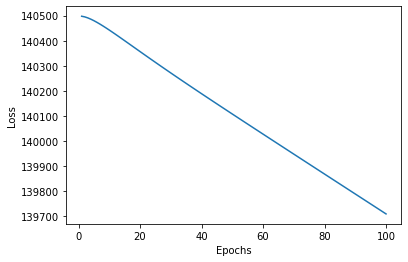

In [25]:
plt.plot(range(1,len(LOSS)+1), LOSS)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
def predict(x, w1, w0):
    return tf.squeeze(tf.matmul(w1,x, transpose_a = True, transpose_b = True) + w0)

predict(x,w1, w0)

    